In [1]:
import numpy as np
from scipy import linalg as la

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$


In [94]:
N = 3000 # number of samples in dataset
x1 = np.random.randn(N)
x2 = x1+np.random.randn(N)*3
x3 = 2*x1+x2
X = np.stack([x1,x2,x3])

* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset


In [96]:
C = np.cov(X)
val, vec = la.eig(C)

# clean and reorder
val = np.real_if_close(val)
perm = np.argsort(val)[::-1]
val = val[perm]
vec = vec[:,perm]

* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result

In [97]:
U, spectrum, Vt = la.svd(X)
val2 = spectrum**2/(N-1)

# eigenvalue comparison
val,val2

(array([ 2.56237251e+01,  1.99318925e+00, -4.32196958e-16]),
 array([2.56251236e+01, 1.99318926e+00, 7.85524062e-32]))

In [107]:
#eigenvectors comparison
U,vec

(array([[-0.10921297,  0.56692668, -0.81649658],
        [-0.58512758, -0.7006847 , -0.40824829],
        [-0.80355351,  0.43316866,  0.40824829]]),
 array([[-0.10921288,  0.5669267 , -0.81649658],
        [-0.58512769, -0.70068461, -0.40824829],
        [-0.80355344,  0.43316879,  0.40824829]]))

Eigenvectors computed in tis way are compatible only because the columns of our dataset are zero mean centered.


* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.

In [113]:
relative_weight = spectrum/spectrum.sum()
target_w = 0.99
w=0
n=0
while(w<target_w):
    w += relative_weight[n]
    n += 1
    
print("spectrum =",spectrum)
print("# of relevant eigenvectors =",i)

spectrum = [2.77217867e+02 7.73147761e+01 1.53485721e-14]
# of relevant eigenvectors = 2


* Redefine the data in the basis yielded by the PCA procedure

The transformation matrix from the dataset origina basis set to the eigenvalue basis set is $U^T$, or the eigenvector matrix transposed.

In [100]:
X2 = np.dot(U.T,X)

We can observe that the third row in the new dataset is reduced to machine-precision values and therefore, if the scale of the data are somehow comparable, it can be tropped since there is no variance in the dataset in that direction.

In [101]:
np.abs(X2).max(axis=1)

array([1.86603477e+01, 5.01832981e+00, 1.73358852e-15])

* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.

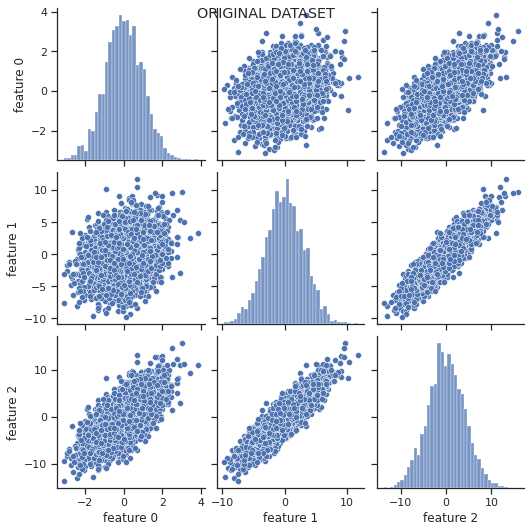

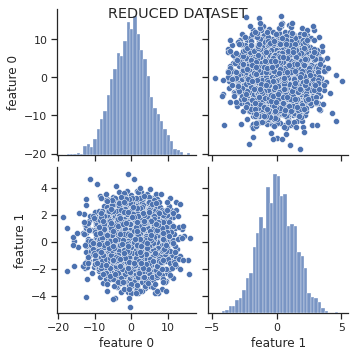

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme(style="ticks")
sns.pairplot(pd.DataFrame({"feature 0":X[0],"feature 1":X[1], "feature 2":X[2]}))
plt.suptitle("ORIGINAL DATASET")
plt.show()

sns.pairplot(pd.DataFrame({"feature 0":X2[0],"feature 1":X2[1]}))
plt.suptitle("REDUCED DATASET")
plt.show()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [147]:
X3 = np.concatenate([X,np.random.standard_normal([10,N])/50],axis=0)

In [148]:
vec3, spectrum3, Vt3 = la.svd(X3)
val3 = spectrum**2/(N-1)

# retain only the relevant components for the 99% of variability
relative_weight = spectrum3/spectrum3.sum()
target_w = 0.99
w=0
n=0
while(w<target_w):
    w += relative_weight[n]
    n += 1
    
print("spectrum3 =",spectrum3)
print("# of relevant eigenvectors =",i)

spectrum3 = [2.77217883e+02 7.73147989e+01 1.16608318e+00 1.14219841e+00
 1.12919358e+00 1.11211624e+00 1.10398728e+00 1.09183246e+00
 1.07532095e+00 1.07315702e+00 1.06592077e+00 1.05787878e+00
 1.53418350e-14]
# of relevant eigenvectors = 2


The added features do not contribute significantly to the variance of the dataset.

I need to point out that my physical consistency sense was agitated, since one should in principle espablish some kind of scalar product (or of metric) in the feature space so that the importance of the variance in one direction can be meeaningfully compared with the variance in other directions. I guess that in a real situation, one should choose some wheight to attribute to each feature in order to establish how much the experimenter values a variance in that particular feature. This weight could be practically implemented by setting the variance of the corresponding feature with the weight value.

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 